In [1]:
import ROOT
import matplotlib.pyplot as plt
import numpy as np
import h5py
import lmfit

from lmfit import Minimizer, Parameters, report_fit

from scipy.optimize import curve_fit
from scipy.signal import *
from array import array

from matplotlib.colors import LogNorm

Welcome to JupyROOT 6.20/04


In [2]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [3]:
def butter_bandstop_filter(data, lowcut, highcut, fs, order):


        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq

        i, u = butter(order, [low, high], btype='bandstop')
        y = lfilter(i, u, data)
        return y

In [4]:
'''butterworth'''
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq
    b,a = butter(order, [low, high], btype='band')
    return b,a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5) :
    b,a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b,a,data)
    return y

In [5]:
def myfft(ayy_tmp_ch3, sampling_rate, sampling_interval, idraw):
    n_sample = len(ayy_tmp_ch3)
    t = np.arange(0,n_sample*sampling_interval, sampling_interval)
    k = np.arange(n_sample)
    T = n_sample/sampling_rate
    frq_bin = 1/T
    frq = k/T
    frq = frq[:n_sample//2]
    Yr = np.fft.fft(ayy_tmp_ch3)
    Y = Yr/n_sample
    Y = Y[:n_sample//2]

    if idraw ==1 :
        plt.loglog(frq, 2*abs(Y)/np.sqrt(frq_bin),'r')
        #plt.plot(frq, 2*abs(Y),'r')
    return frq, 2*abs(Y)/np.sqrt(frq_bin), Yr

In [6]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [7]:
def ptov(data) :
    a = np.diff(np.sign(np.diff(data))).nonzero()[0] + 1
    b = (np.diff(np.sign(np.diff(data))) > 0).nonzero()[0] + 1
    c = (np.diff(np.sign(np.diff(data))) < 0).nonzero()[0] + 1
    return a, b, c

In [8]:
tr1 = ROOT.TChain("ref", "reference waveform at 15mK")
tr1.Add("/home/wootaekim/work/Ana/ref_15mK_cut1.root")
tr2 = ROOT.TChain("ref", "ref/erence waveform at 15mK")
tr2.Add("/home/wootaekim/work/Ana/ref_15mK_cut2.root")
tr3 = ROOT.TChain("ref", "reference waveform at 15mK")
tr3.Add("/home/wootaekim/work/Ana/ref_15mK_cut3.root")
tr4 = ROOT.TChain("ref", "reference waveform at 15mK")
tr4.Add("/home/wootaekim/work/Ana/ref_15mK_cut4.root")

tr1.GetEntry(0)
tr2.GetEntry(0)
tr3.GetEntry(0)
tr4.GetEntry(0)

### riestime2 = low pass filter risetime
###((risetime2 > 15) & (risetime2 < 25) & (LP_hpeak*10./2**18 > 0.004) & (LP_hpeak*10./2**18 < 0.013))
cut1 = array('f', tr1.ref_15mK_1)
cut1 = np.array(cut1).astype(float)
#cut1 = 1./(np.max(cut1)-np.mean(cut1[9000:9500]))*cut1 - np.mean(cut1[9000:9500])

###((risetime2 > 60) & (risetime2 < 100) & (LP_hpeak*10./2**18 > 0.005) & (LP_hpeak*10./2**18 < 0.015))
cut2 = array('f', tr2.ref_15mK_1)
cut2 = np.array(cut2).astype(float)
#cut2 = 1./(np.max(cut2)-np.mean(cut2[9000:9500]))*cut2 - np.mean(cut2[9000:9500])

###((risetime2 > 104) & (risetime2 < 115) & (LP_hpeak*10./2**18 > 0.04) & (LP_hpeak*10./2**18 < 0.12))
cut3 = array('f', tr3.ref_15mK_1)
cut3 = np.array(cut3).astype(float)
#cut3 = 1./(np.max(cut3)-np.mean(cut3[9000:9500]))*cut3 - np.mean(cut3[9000:9500])

###((risetime2 > 34) & (risetime2 < 45) & (LP_hpeak*10./2**18 > 0.012) & (LP_hpeak*10./2**18 < 0.015))

cut4 = array('f', tr4.ref_15mK_1)
cut4 = np.array(cut4).astype(float)
#cut4 = 1./(np.max(cut4)-np.mean(cut4[9000:9500]))*cut4 - np.mean(cut4[9000:9500])

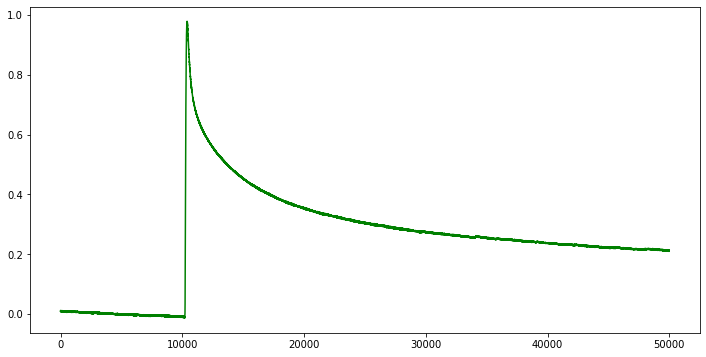

In [9]:
fig, ax =plt.subplots(figsize=(12,6))
ax.plot(cut3, color='g')
plt.show()

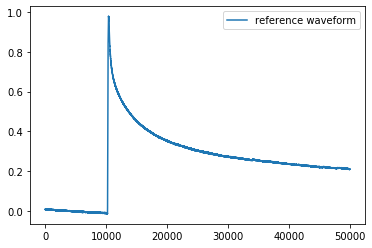

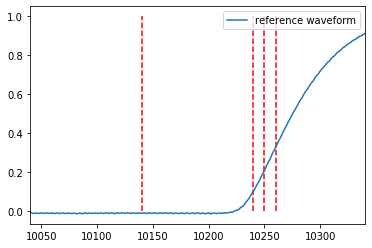

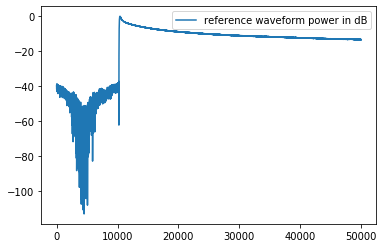

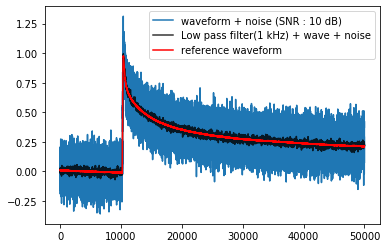

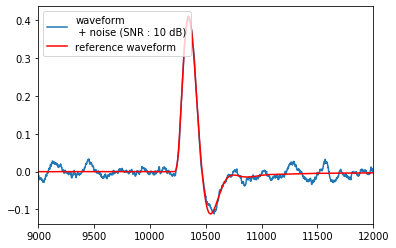

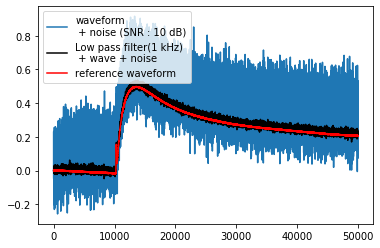

In [28]:
ref_watts = cut3 ** 2
ref_db = 10 * np.log10(ref_watts)

plt.plot(cut3,label='reference waveform')
plt.legend()
plt.show()

plt.plot(cut3,label='reference waveform')
plt.vlines(2048*5, 0, 1,'r',linestyle='--')
plt.vlines(2048*5-100, 0, 1,'r',linestyle='--')
plt.vlines(2048*5+10, 0, 1,'r',linestyle='--')
plt.vlines(2048*5+20, 0, 1,'r',linestyle='--')

plt.legend()
plt.xlim(2048*5-200, 2048*5+100)
plt.show()

plt.plot(ref_watts,label='reference waveform power')
plt.legend()
plt.show()

plt.plot(ref_db,label='reference waveform power in dB')
plt.legend()
plt.show()

# Set a target SNR
target_snr_db = 10
# Calculate signal power and convert to dB 
sig_avg_watts = np.mean(ref_watts)
sig_avg_db = 10 * np.log10(sig_avg_watts)
# Calculate noise according to [2] then convert to watts
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(ref_watts))
# Noise up the original signal
y_volts = cut3 + noise_volts

lp_array = butter_lowpass_filter(y_volts, 1000, 100e+3, order=1)


plt.plot(y_volts,label='waveform + noise (SNR : {0} dB)'.format(target_snr_db))
plt.plot(lp_array, label='Low pass filter(1 kHz) + wave + noise', alpha=0.8, c='k')
plt.plot(cut3, label='reference waveform', c='red')


plt.legend()
plt.show()

lowcut=200
highcut=500
bp1 = butter_bandpass_filter(y_volts-y_volts[0], lowcut, highcut, 100e+3, order=1)
bp2 = butter_bandpass_filter(cut3-cut3[0], lowcut, highcut, 100e+3, order=1)
bp3 = butter_bandpass_filter(lp_array-lp_array[0], lowcut, highcut, 100e+3, order=1)

plt.plot(bp1, label='waveform\n + noise (SNR : {0} dB)'.format(target_snr_db))
#plt.plot(bp3, label='Low pass filter(1 kHz)\n + wave + noise', c='k')
plt.plot(bp2, label='reference waveform', c='red')
plt.xlim(9000,12000)
plt.legend(loc='upper left')
plt.show()

lowcut=10
highcut=1000
bs1 = butter_bandstop_filter(y_volts-y_volts[0], lowcut, highcut, 100e+3, order=1)
bs2 = butter_bandstop_filter(cut3-cut3[0], lowcut, highcut, 100e+3, order=1)
bs3 = butter_bandstop_filter(lp_array-lp_array[0], lowcut, highcut, 100e+3, order=1)

plt.plot(bs1, label='waveform\n + noise (SNR : {0} dB)'.format(target_snr_db))
plt.plot(bs3, label='Low pass filter(1 kHz)\n + wave + noise', c='k')
plt.plot(bs2, label='reference waveform', c='red')

plt.legend(loc='upper left')
plt.show()

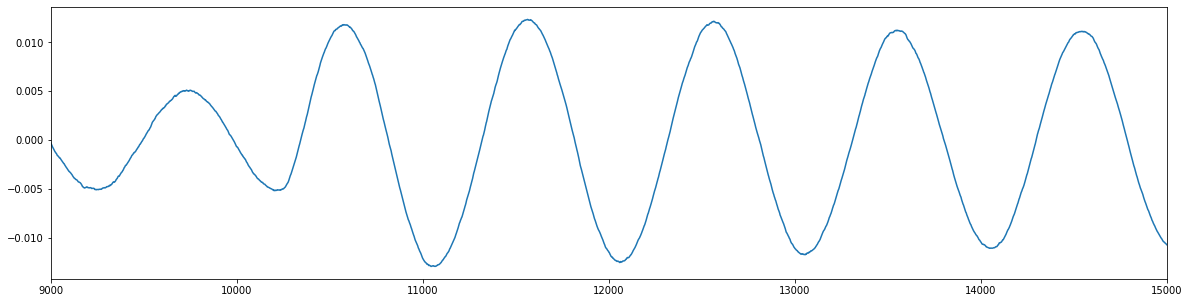

'fig, ax = plt.subplots(figsize=(20,5))\nprint (len(ii))\nplt.show()'

In [316]:
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(y_volts,label='waveform + noise (SNR : {0} dB)'.format(target_snr_db))
plt.show()

frq_i = 100
frq_f = 101

y = butter_bandpass_filter(y_volts-y_volts[0], frq_i, frq_f, 100e+3, order=1)
yyy = moving_average(y, 20)

# Find peaks(max).

peak_indexes = argrelextrema(yyy, np.greater)
peak_indexes = peak_indexes[0]
# Find valleys(min).

valley_indexes = argrelextrema(yyy, np.less)
valley_indexes = valley_indexes[0]
            
            
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(y)
plt.xlim(9000,15000)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
plt.plot(yyy)

# Plot peaks.
peak_x = peak_indexes
peak_y = yyy[peak_indexes]
#plt.plot(peak_x, peak_y, marker='o', linestyle='dashed', color='green', label="Peaks, {0}".format(len(peak_indexes)))
                
# Plot valleys.
valley_x = valley_indexes
valley_y = yyy[valley_indexes]
#plt.plot(valley_x, valley_y, marker='o', linestyle='dashed', color='red', label="Valleys, {0}".format(len(valley_indexes)))
                
#plt.xlim(1000,15000)
plt.show()

'''fig, ax = plt.subplots(figsize=(20,5))
print (len(ii))
plt.show()'''

In [290]:
noise = []
for i in range(5):
    noise = np.append(noise, y_volts[0:10000])

print (len(noise))

frq_n, y_n, yr_n = myfft(y_volts[0:10000], 100e+3, 1/100e+3, 0)

plt.loglog(frq_n, y_n)
plt.show()

frq, y, yr = myfft(y_volts, 100e+3, 1/100e+3, 0)

plt.loglog(frq, y)
plt.loglog(frq_n, y_n)
plt.show()

50000


Keys : <KeysViewHDF5 ['test_noise']>
['test_noise']
int32
(36, 50000)


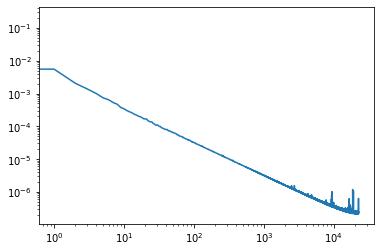

In [269]:
noise = [0]*22500
ii = 0 
with h5py.File('noise1.h5', 'r') as f :
    print ("Keys : %s" % f.keys())
    print (list(f.keys()))

    dset = f['test_noise']
    print (dset.dtype)
    print (dset.shape)
    
    for i in range(dset.shape[0]) :
        ii += 1
        noi_frq, noi_y, noi_yr = myfft(np.array(dset[i][0:45000])*10/2**18, 100e+3, 1/100e+3, 0)
        noise += noi_y
noise = noise/ii
frq1 = noi_frq
plt.loglog(noise/ii)

Keys : <KeysViewHDF5 ['test_wave']>
['test_wave']


 y
 q


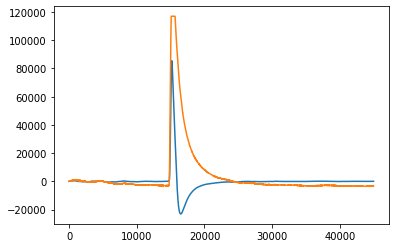

 q


In [270]:
signal = [0]*22500
ii = 0
with h5py.File('test2.h5', 'r') as f :
    print ("Keys : %s" % f.keys())
    print (list(f.keys()))
    dset = f['test_wave']
    for i in range(dset.shape[0]) :
        
        y = butter_bandpass_filter(dset[i][2]- dset[i][2][0], 30, 200, 100e+3, order=1)
        #plt.plot(dset[i][2])
        if ((np.max(y[12000:18000]) >= 8000) and (abs(np.min(y[12000:18000])) >= (np.max(y[12000:18000])/8))) :
            plt.plot(y)
            plt.plot(dset[i][2] - dset[i][2][0])
            plt.show()
            a = input()

        if (a == 'q') :
            break
        if (a == 'y') :
            frq, Y, Yr = myfft(dset[i][2] - dset[i][2][0], 100e+3, 1./100e+3, 0)
            signal += Y
            ii += 1
            a = input()


signal = signal/ii

ValueError: x and y must have same first dimension, but have shapes (25000,) and (22500,)

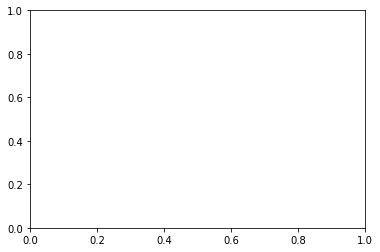

In [284]:
fig, ax = plt.subplots()
ax.plot(frq, signal*10/2**18, label='signal')
ax.plot(frq1, noise, label='nosie')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$\\frac{V}{\sqrt{Hz}}$')
ax.set_xlabel('Hz')
ax.legend(fontsize=12)
plt.show()

fig, ax = plt.subplots()
ax.plot(frq, abs(signal*10/2**18-noise), label='abs(signal-noise)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$\\frac{V}{\sqrt{Hz}}$')
ax.set_xlabel('Hz')
ax.legend(fontsize=12)
plt.show()

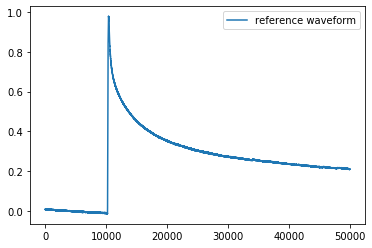

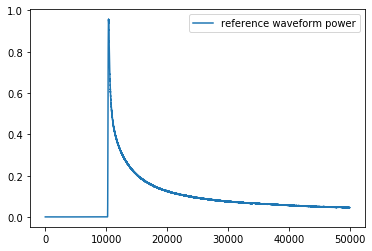

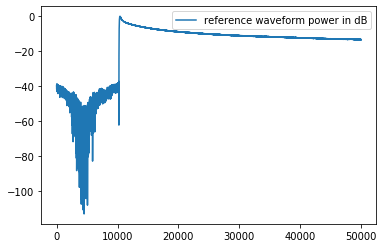

-10.397182690541936


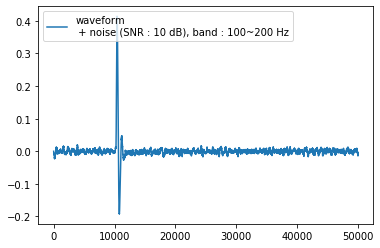

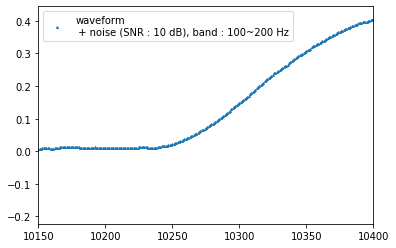

In [371]:
ref_watts = cut3 ** 2
ref_db = 10 * np.log10(ref_watts)

plt.plot(cut3,label='reference waveform')
plt.legend()
plt.show()

plt.plot(ref_watts,label='reference waveform power')
plt.legend()
plt.show()

plt.plot(ref_db,label='reference waveform power in dB')
plt.legend()
plt.show()

# Set a target SNR
target_snr_db = 10
# Calculate signal power and convert to dB 
sig_avg_watts = np.mean(ref_watts)
sig_avg_db = 10 * np.log10(sig_avg_watts)
print (sig_avg_db)
# Calculate noise according to [2] then convert to watts
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(ref_watts))
# Noise up the original signal
y_volts = cut3 + noise_volts

lp_array = butter_lowpass_filter(y_volts, 1000, 100e+3, order=1)


plt.plot(y_volts,label='waveform + noise (SNR : {0} dB)'.format(target_snr_db))
plt.plot(lp_array, label='Low pass filter(1 kHz) + wave + noise', alpha=0.8, c='k')
plt.plot(cut3, label='reference waveform', c='red')


plt.legend()
plt.show()

lowcut=100
highcut=200
bp1 = butter_bandpass_filter(y_volts-y_volts[0], lowcut, highcut, 100e+3, order=1)
bp2 = butter_bandpass_filter(cut3-cut3[0], lowcut, highcut, 100e+3, order=1)
bp3 = butter_bandpass_filter(lp_array-lp_array[0], lowcut, highcut, 100e+3, order=1)

plt.plot(bp1, label='waveform\n + noise (SNR : {0} dB), band : {1}~{2} Hz'.format(target_snr_db, lowcut, highcut))
#plt.plot(bp3, label='Low pass filter(1 kHz)\n + wave + noise', c='k')
#plt.plot(bp2, label='reference waveform', c='red')

plt.legend(loc='upper left')
plt.show()

plt.plot(bp1,'^',markersize=2, label='waveform\n + noise (SNR : {0} dB), band : {1}~{2} Hz'.format(target_snr_db, lowcut, highcut))
#plt.plot(bp3, label='Low pass filter(1 kHz)\n + wave + noise', c='k')
#plt.plot(bp2, label='reference waveform', c='red')
plt.xlim(10150,10400)
plt.legend(loc='upper left')
plt.show()

lowcut=100
highcut=1000
bs1 = butter_bandstop_filter(y_volts-y_volts[0], lowcut, highcut, 100e+3, order=1)
bs2 = butter_bandstop_filter(cut3-cut3[0], lowcut, highcut, 100e+3, order=1)
bs3 = butter_bandstop_filter(lp_array-lp_array[0], lowcut, highcut, 100e+3, order=1)

plt.plot(bs1, label='waveform\n + noise (SNR : {0} dB)'.format(target_snr_db))
plt.plot(bs3, label='Low pass filter(1 kHz)\n + wave + noise', c='k')
plt.plot(bs2, label='reference waveform', c='red')

plt.legend(loc='upper left')
plt.show()

In [358]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

print ("\nsignaltonoise ratio for arr1 : ",  
       signaltonoise(y_volts, axis = 0, ddof = 0))  



signaltonoise ratio for arr1 :  1.310719733419826


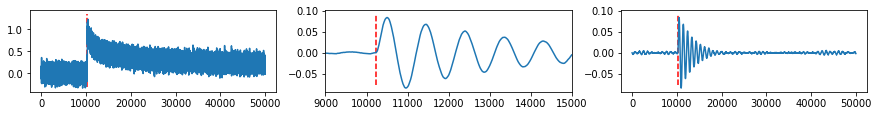

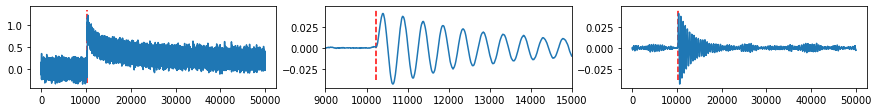

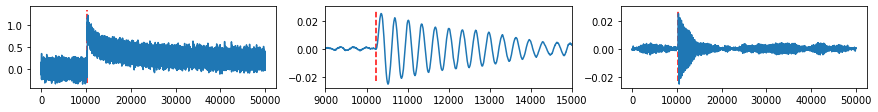

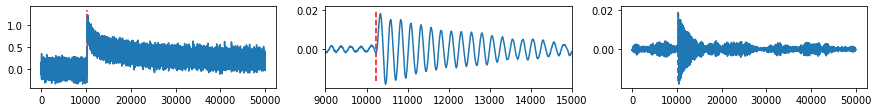

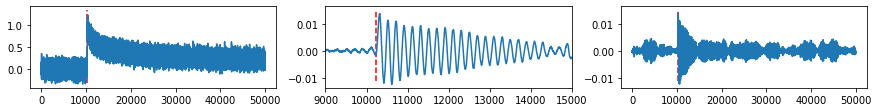

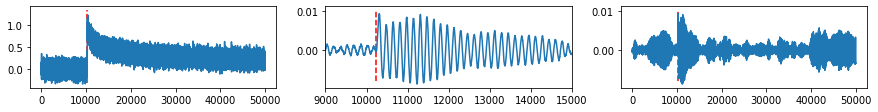

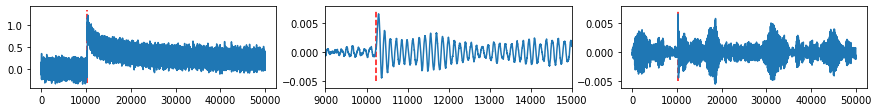

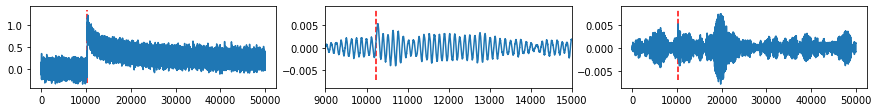

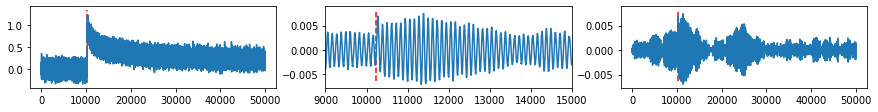

In [375]:

frq_i = 100
rms2 = []
p2v2 = []
for i in range(1,10) :
    y = butter_bandpass_filter(y_volts-y_volts[0], (frq_i*i), (frq_i*i)+10, 100e+3, order=1)
    yyy = moving_average(y, 5)

    # Find peaks(max).
    
    peak_indexes = argrelextrema(yyy, np.greater)
    peak_indexes = peak_indexes[0]
    # Find valleys(min).

    valley_indexes = argrelextrema(yyy, np.less)
    valley_indexes = valley_indexes[0]
            
            
    fig, ax = plt.subplots(1, 3, figsize=(15,1.5))
    
    ax[0].plot(y_volts,label='waveform + noise (SNR : {0} dB)'.format(target_snr_db))
    ax[0].vlines(10240, np.min(y_volts)-0.1*np.min(y_volts) , np.max(y_volts)+0.1*np.max(y_volts), 'r', linestyle='--', linewidth=1.5)
    ax[1].plot(y)
    ax[1].vlines(10240, np.min(y)-0.1*np.min(y) , np.max(y)+0.1*np.max(y), 'r', linestyle='--', linewidth=1.5)

    ax[1].set_xlim(9000,15000)

    ax[2].plot(yyy)
    ax[2].vlines(10240, np.min(yyy)-0.1*np.min(yyy) , np.max(y)+0.1*np.max(y), 'r', linestyle='--', linewidth=1.5)

    # Plot peaks.
    peak_x = peak_indexes
    peak_y = yyy[peak_indexes]
    #ax[2].plot(peak_x, peak_y, marker='o', linestyle='dashed', color='green', label="Peaks, {0}".format(len(peak_indexes)))
                
    # Plot valleys.
    valley_x = valley_indexes
    valley_y = yyy[valley_indexes]
    #ax[2].plot(valley_x, valley_y, marker='o', linestyle='dashed', color='red', label="Valleys, {0}".format(len(valley_indexes)))
                
    #plt.xlim(1000,15000)
    plt.show()
    
    rms2.append(np.std(y[0:10000]))
    p2v2.append(np.max(y[10000:20000])-np.min(y[10000:20000]))


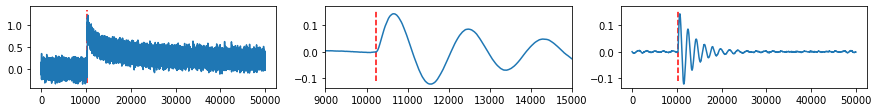

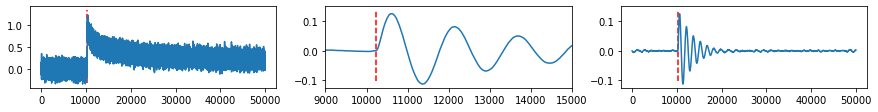

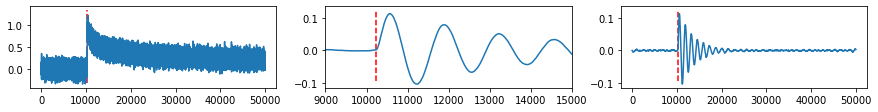

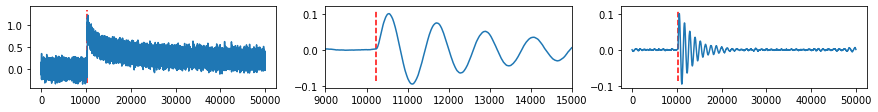

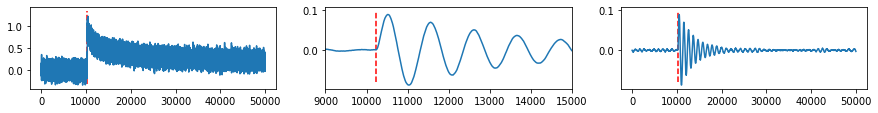

In [376]:
frq_i = 10
rms1 = []
p2v1 = []
for i in range(1,10) :
    y = butter_bandpass_filter(y_volts-y_volts[0], (frq_i*i), (frq_i*i)+10, 100e+3, order=1)
    yyy = moving_average(y, 5)

    # Find peaks(max).
    
    peak_indexes = argrelextrema(yyy, np.greater)
    peak_indexes = peak_indexes[0]
    # Find valleys(min).

    valley_indexes = argrelextrema(yyy, np.less)
    valley_indexes = valley_indexes[0]
            
            
    fig, ax = plt.subplots(1, 3, figsize=(15,1.5))
    
    ax[0].plot(y_volts,label='waveform + noise (SNR : {0} dB)'.format(target_snr_db))
    ax[0].vlines(10240, np.min(y_volts)-0.1*np.min(y_volts) , np.max(y_volts)+0.1*np.max(y_volts), 'r', linestyle='--', linewidth=1.5)
    ax[1].plot(y)
    ax[1].vlines(10240, np.min(y)-0.1*np.min(y) , np.max(y)+0.1*np.max(y), 'r', linestyle='--', linewidth=1.5)

    ax[1].set_xlim(9000,15000)

    ax[2].plot(yyy)
    ax[2].vlines(10240, np.min(yyy)-0.1*np.min(yyy) , np.max(y)+0.1*np.max(y), 'r', linestyle='--', linewidth=1.5)

    # Plot peaks.
    peak_x = peak_indexes
    peak_y = yyy[peak_indexes]
    #ax[2].plot(peak_x, peak_y, marker='o', linestyle='dashed', color='green', label="Peaks, {0}".format(len(peak_indexes)))
                
    # Plot valleys.
    valley_x = valley_indexes
    valley_y = yyy[valley_indexes]
    #ax[2].plot(valley_x, valley_y, marker='o', linestyle='dashed', color='red', label="Valleys, {0}".format(len(valley_indexes)))
                
    #plt.xlim(1000,15000)
    plt.show()
    
    rms1.append(np.std(y[0:10000]))
    p2v1.append(np.max(y[10000:20000])-np.min(y[10000:20000]))


In [377]:
plt.plot(np.linspace(10,90,9),np.array(p2v1)/np.array(rms1), 'bo', label='10 ~ 90 Hz')
plt.plot(np.linspace(100,900,9),np.array(p2v2)/np.array(rms2), 'ro', label='100 ~ 900 Hz')
plt.ylabel('PtoV/rms')
plt.xlabel('frequency (Hz)')
plt.xscale('log')
#plt.yscale('log')
grid_n = np.append(np.linspace(10,90,9), np.linspace(100,900,9))
plt.xticks(grid_n)
plt.legend()
plt.title("signal to noise ratio : 0.01")
plt.grid()
plt.show()

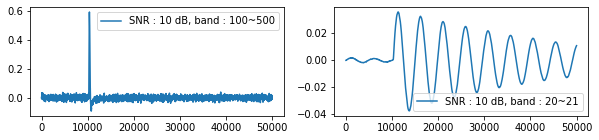

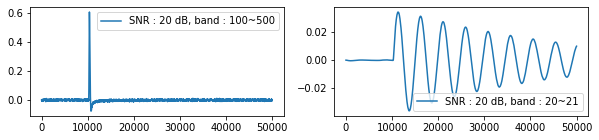

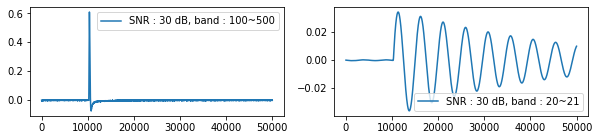

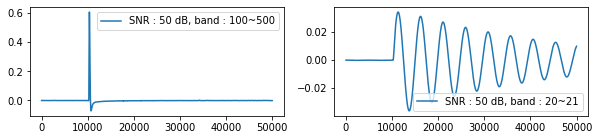

In [ ]:
ref_watts = cut3 ** 2
ref_db = 10 * np.log10(ref_watts)

for i in range(1,10) :
    # Set a target SNR
    target_snr_db = 10*i

    # Calculate signal power and convert to dB 
    sig_avg_watts = np.mean(ref_watts)
    sig_avg_db = 10 * np.log10(sig_avg_watts)

    # Calculate noise according to [2] then convert to watts
    noise_avg_db = sig_avg_db - target_snr_db
    noise_avg_watts = 10 ** (noise_avg_db / 10)

    # Generate an sample of white noise
    mean_noise = 0
    noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(ref_watts))

    # Noise up the original signal
    y_volts = cut3 + noise_volts

    lowcut1=100
    highcut1=500
    
    lowcut2=20
    highcut2=21
    bp1 = butter_bandpass_filter(y_volts-y_volts[0], lowcut1, highcut1, 100e+3, order=1)
    bp2 = butter_bandpass_filter(y_volts-y_volts[0], lowcut2, highcut2, 100e+3, order=1)
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 2))
    
    ax[0].plot(bp1,label='SNR : {0} dB, band : {1}~{2}'.format(target_snr_db, lowcut1, highcut1))
    ax[1].plot(bp2,label='SNR : {0} dB, band : {1}~{2}'.format(target_snr_db, lowcut2, highcut2))
    ax[0].legend()
    ax[1].legend()
    plt.show()

